In this notebook, we will <b style = "color:orange">detect outliers</b> first and then based on our requirements we will either <b style = "color:orange">cap</b> the outliers or <b style = "color:orange">trim</b> them from the dataset.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('placement.csv')

In [4]:
df.sample(5)

,cgpa,placement_exam_marks,placed
171,6.20,38.0,1
808,7.68,31.0,0
158,5.74,50.0,0
413,6.65,28.0,1
718,7.12,36.0,1


In [5]:
df.shape

(1000, 3)

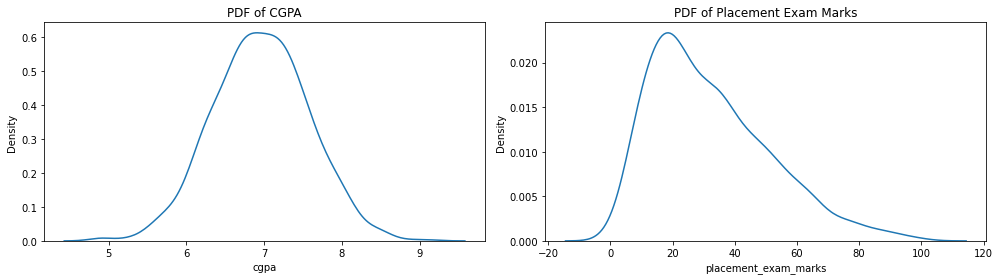

In [6]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(df['cgpa'])
plt.title('PDF of CGPA')

plt.subplot(122)
sns.kdeplot(df['placement_exam_marks'])
plt.title('PDF of Placement Exam Marks')


plt.tight_layout()
plt.show()

In [8]:
"""
Close to zero, i.e 'cgpa' feature is close to normally distributed.
"""
df['cgpa'].skew()

-0.014529938929314918

In [17]:
"""
We can use z-score on CGPA columns because the data in this column is uniformly distributed 
or closely uniformly distributed. CGPA holds almost a Bell shaped curve.
"""

print(f"Mean value of cgpa {df['cgpa'].mean()}")
print(f"Standard Deviation value of cgpa {df['cgpa'].std()}")
print(f"Min value of cgpa {df['cgpa'].min()}")
print(f"Max value of cgpa {df['cgpa'].max()}")

Mean value of cgpa 6.96124000000001
Standard Deviation value of cgpa 0.6158978751323894
Min value of cgpa 4.89
Max value of cgpa 9.12


#### <b style = "color:green">Approach 1</b>

In [43]:
"""
Finding out the boundary values.
"""
mean = df['cgpa'].mean()
std = df['cgpa'].std()
hv = df['cgpa'].mean() + 3*df['cgpa'].std()
lv = df['cgpa'].mean() - 3*df['cgpa'].std()
print(f"Higest value allowed {hv}")
print(f"Lowest value allowed {lv}")

Higest value allowed 8.808933625397177
Lowest value allowed 5.113546374602842


In [33]:
df[(df['cgpa'] < lv)  | (df['cgpa'] > hv)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


### <b style = "color:red">Trimming</b>

In trimming, we <b style = "color:orange">discard</b> all the outliers from our dataset.

In [38]:
new_df = df[(df['cgpa'] >= lv)  & (df['cgpa'] <= hv)]

In [39]:
new_df.shape

(995, 3)

#### <b style = "color:green">Approach 2</b>

In [49]:
"""
Creating a new column by calculating z-score. And then discard outliers which has values less than -3 and greater than +3
"""

df['cgpa_zscore'] = (df['cgpa'] - mean) / std

In [46]:
df.head(7)

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
5,7.30,23.0,1,0.550026
6,6.69,11.0,0,-0.440398


In [48]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


### <b style = "color:red">Trimming</b>

In [53]:
new_df1 = df[(df['cgpa_zscore'] >= -3) & (df['cgpa_zscore'] <= 3)]
new_df1.shape

(995, 4)

In [54]:
new_df1.head(7)

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
5,7.30,23.0,1,0.550026
6,6.69,11.0,0,-0.440398


### <b style = "color:red">Capping</b>

We cap our outliers data and make the limit i.e, above a particular value or less than that value, all the values will be considered as outliers, and the number of outliers in the dataset gives that capping number.

In [57]:
#hv
#lv

In [59]:
df['cgpa'] = np.where(df['cgpa'] > hv,hv,
        np.where(df['cgpa'] < lv,lv,df['cgpa']))

In [63]:
df.shape

(1000, 4)

In [61]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64